In [8]:
import numpy as np
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True )

Mounted at /content/drive


In [10]:
pd.options.display.max_rows = 200

In [11]:
df=pd.read_csv("/content/drive/MyDrive/CIC-IDS-2018.csv")
df

<ipython-input-11-74ac0b165da8>:1: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/CIC-IDS-2018.csv")


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,57610,6,02/03/2018 04:14:05,25,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,52347,6,02/03/2018 02:48:44,63,3,1,31,0.0,31,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,55970,6,16/02/2018 01:46:19,4217799,5,3,935,350.0,935,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,80,6,02/03/2018 05:17:21,54499550,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,3389,6,02/03/2018 01:53:13,2697973,9,10,1278,1677.0,677,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828419,22,6,14/02/2018 03:13:27,381223,22,22,1912,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828420,22,6,14/02/2018 03:27:51,324836,23,20,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828421,22,6,14/02/2018 02:39:25,393769,22,20,1944,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce
828422,22,6,14/02/2018 03:16:09,297287,22,22,1928,2665,640,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce


In [12]:
columns_to_drop = [
  'Dst Port',
  'Timestamp',
  'Fwd PSH Flags',
  'Bwd PSH Flags',
  'Fwd URG Flags',
  'Bwd URG Flags',
  'Flow Byts/s',
  'Flow Pkts/s']
df.drop(columns=columns_to_drop, inplace=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df=df[df["Label"]!="Label"]
attack_mapping = {
  'Benign': 0,
  'DDOS attack-HOIC': 1,
  'DoS attacks-Hulk': 2,
  'Bot': 3,
  'FTP-BruteForce': 4,
  'SSH-Bruteforce': 5,
  'Infilteration': 6,
  'DoS attacks-GoldenEye': 7,
  'DoS attacks-Slowloris': 8,
  'DDOS attack-LOIC-UDP': 9,
  'Brute Force -Web':10,
  'Brute Force -XSS':11,
  'SQL Injection':12,
}
df.loc[:, 'Label'] = df["Label"].map(attack_mapping)
df

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,25,2,0,0,0.0,0,0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,63,3,1,31,0.0,31,0,10.333333,17.897858,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,4217799,5,3,935,350.0,935,0,187.0,418.144712,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,54499550,2,0,0,0.0,0,0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,2697973,9,10,1278,1677.0,677,0,142.0,213.267438,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828418,6,393263,22,20,1928,2665,640,0,87.636364,137.780552,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0
828419,6,381223,22,22,1912,2665,640,0,86.909091,137.688022,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0
828420,6,324836,23,20,1928,2665,640,0,83.826087,135.847392,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0
828421,6,393769,22,20,1944,2665,640,0,88.363636,137.869001,...,32,0.0,0.0,0,0,0.0,0.0,0,0,5.0


In [13]:
df["Label"].value_counts()

,count
Label,
0.0,521038
1.0,35609
2.0,29818
3.0,15238
6.0,13401
5.0,9429
7.0,4151
8.0,1026
9.0,173


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled = df.copy()
feature_cols = df.drop('Label', axis=1).columns
df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])
df_scaled=df_scaled.groupby("Label").apply(lambda a:a)
df_scaled

<ipython-input-14-dba8bc2ac0a6>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_scaled=df_scaled.groupby("Label").apply(lambda a:a)


Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
Label                                                               
0.0   0       0.352941       0.998911      0.000006      0.000000   
      1       0.352941       0.998911      0.000013      0.000008   
      2       0.352941       0.998950      0.000026      0.000024   
      3       0.352941       0.999406      0.000006      0.000000   
      4       0.352941       0.998936      0.000051      0.000081   
...                ...            ...           ...           ...   
12.0  314570  0.352941       0.998957      0.000019      0.000032   
      314571  0.352941       0.998911      0.000006      0.000000   
      557396  0.352941       0.998957      0.000026      0.000024   
      557397  0.352941       0.998957      0.000019      0.000032   
      557398  0.352941       0.998957      0.000026      0.000032   

              TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
Label                                                             
0.0   0          0.000000e+00         0.000000         0.000000   
      1          2.146936e-07         0.000000         0.000698   
      2          6.475435e-06         0.000002         0.021062   
      3          0.000000e+00         0.000000         0.000000   
      4          8.850915e-06         0.000011         0.015250   
...                       ...              ...              ...   
12.0  314570     3.705195e-06         0.000002         0.012052   
      314571     0.000000e+00         0.000000         0.000000   
      557396     3.864484e-06         0.000002         0.012570   
      557397     4.058401e-06         0.000012         0.013201   
      557398     4.390830e-06         0.000026         0.014282   

              Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  ...  \
Label                                                             ...   
0.0   0                   0.0          0.000000         0.000000  ...   
      1                   0.0          0.001749         0.003367  ...   
      2                   0.0          0.031654         0.078660  ...   
      3                   0.0          0.000000         0.000000  ...   
      4                   0.0          0.024037         0.040119  ...   
...                       ...               ...              ...  ...   
12.0  314570              0.0          0.022640         0.050321  ...   
      314571              0.0          0.000000         0.000000  ...   
      557396              0.0          0.018891         0.046944  ...   
      557397              0.0          0.024799         0.055118  ...   
      557398              0.0          0.021464         0.053337  ...   

              Fwd Seg Size Min  Active Mean  Active Std  Active Max  \
Label                                                                 
0.0   0               0.454545          0.0         0.0         0.0   
      1               0.454545          0.0         0.0         0.0   
      2               0.727273          0.0         0.0         0.0   
      3               0.454545          0.0         0.0         0.0   
      4               0.454545          0.0         0.0         0.0   
...                        ...          ...         ...         ...   
12.0  314570          0.454545          0.0         0.0         0.0   
      314571          0.454545          0.0         0.0         0.0   
      557396          0.454545          0.0         0.0         0.0   
      557397          0.454545          0.0         0.0         0.0   
      557398          0.454545          0.0         0.0         0.0   

              Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  Label  
Label                                                                     
0.0   0              0.0        0.0       0.0       0.0       0.0    0.0  
      1              0.0        0.0       0.0       0.0       0.0    0.0  
      2              0.0        0.0       0.0       0.0       0.0    0

In [15]:
def metrics(output,y_test,y_test_types,att_type):
    tp=tn=fp=fn=tpz=fnz=0
    for i in range(len(output)):
        if output[i]<0.5:
            if y_test[i]==0:
                tn+=1
            else:
                fn+=1
        else:
            if y_test[i]==1:
                tp+=1
            else:
                fp+=1
        if y_test_types[i]==att_type:
            if output[i]>=0.5:
                tpz+=1
            else:
                fnz+=1

    accuracy=((tp+tn)*100)/(tp+tn+fp+fn)
    dr=(tp*100)/(tp+fn)
    far=(fp*100)/(fp+tn)
    zdr=(tpz*100)/(tpz+fnz)
    return [accuracy,dr,far,zdr]

In [16]:
import tensorflow as tf
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from sklearn.model_selection import train_test_split

Simulating Zero Day Attacks

In [17]:

# CNN-based model for zero-day network intrusion detection
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

metricarr=[]

for att_type in range(1,13):

    # Organizing data for zero day attack
    df_train, df_test = train_test_split(df_scaled, train_size=0.8, random_state=52)
    zday = df_train[df_train["Label"] == att_type]
    df_test = pd.concat([df_test, zday]).sample(frac=1).reset_index(drop=True)
    zday_train = df_train[df_train["Label"] != att_type].sample(frac=1).reset_index(drop=True)
    X_train = zday_train.drop(["Label"], axis=1).values[..., np.newaxis]  # Reshaping for Conv1D input
    y_train = zday_train["Label"].apply(lambda a: 1 if a > 0 else 0)
    X_test = df_test.drop(["Label"], axis=1).values[..., np.newaxis]  # Reshaping for Conv1D input
    y_test_types = df_test["Label"]
    y_test = y_test_types.apply(lambda a: 1 if a > 0 else 0)

    # Declaring the CNN model
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(71, 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        layers.Dense(1, activation='sigmoid')
    ])

    early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, restore_best_weights=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=20, callbacks=[early_stopping], batch_size=64)

    # Getting the output
    output = model.predict(X_test)

    # Storing metrics in metric array
    metricarr.append(metrics(output, y_test, y_test_types, att_type))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9540 - loss: 0.1733
Epoch 2/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9714 - loss: 0.1197
Epoch 3/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9729 - loss: 0.1121
Epoch 4/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9733 - loss: 0.1083
Epoch 5/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9739 - loss: 0.1058
Epoch 6/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9742 - loss: 0.1041
Epoch 7/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9741 - loss: 0.1041
Epoch 8/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9752 - loss: 0.1007
Epoch 9/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9750 - loss: 0.1000
Epoch 10/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9752 - loss: 0.0996
Epoch 11/20
7432/7432 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9755 - loss: 0.0984
Epoch 12/20
7432/74

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9553 - loss: 0.1754
Epoch 2/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9704 - loss: 0.1210
Epoch 3/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9717 - loss: 0.1158
Epoch 4/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9724 - loss: 0.1116
Epoch 5/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9725 - loss: 0.1103
Epoch 6/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9734 - loss: 0.1068
Epoch 7/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9734 - loss: 0.1058
Epoch 8/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9740 - loss: 0.1038
Epoch 9/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9738 - loss: 0.1040
Epoch 10/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9744 - loss: 0.1014
Epoch 11/20
7503/7503 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9749 - loss: 0.0999
Epoch 12/20
7503/75

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9525 - loss: 0.1693
Epoch 2/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9756 - loss: 0.1077
Epoch 3/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9758 - loss: 0.1036
Epoch 4/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9757 - loss: 0.1023
Epoch 5/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9756 - loss: 0.1013
Epoch 6/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9764 - loss: 0.0983
Epoch 7/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9766 - loss: 0.0966
Epoch 8/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9767 - loss: 0.0961
Epoch 9/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9767 - loss: 0.0958
Epoch 10/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9766 - loss: 0.0953
Epoch 11/20
7685/7685 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9771 - loss: 0.0943
Epoch 12/20
7685/76

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9494 - loss: 0.1858
Epoch 2/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9717 - loss: 0.1192
Epoch 3/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9732 - loss: 0.1117
Epoch 4/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9733 - loss: 0.1096
Epoch 5/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9744 - loss: 0.1047
Epoch 6/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9744 - loss: 0.1038
Epoch 7/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9752 - loss: 0.1010
Epoch 8/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9750 - loss: 0.1006
Epoch 9/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9755 - loss: 0.0983
Epoch 10/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9759 - loss: 0.0963
Epoch 11/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9759 - loss: 0.0962
Epoch 12/20
7875/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9525 - loss: 0.1762
Epoch 2/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9718 - loss: 0.1170
Epoch 3/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9728 - loss: 0.1115
Epoch 4/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9739 - loss: 0.1067
Epoch 5/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9741 - loss: 0.1050
Epoch 6/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9747 - loss: 0.1022
Epoch 7/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9742 - loss: 0.1026
Epoch 8/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9747 - loss: 0.1004
Epoch 9/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9747 - loss: 0.1000
Epoch 10/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9748 - loss: 0.0992
Epoch 11/20
7758/7758 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9751 - loss: 0.0980
Epoch 12/20
7758/77

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9724 - loss: 0.0889
Epoch 2/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9940 - loss: 0.0303
Epoch 3/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9954 - loss: 0.0239
Epoch 4/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9957 - loss: 0.0218
Epoch 5/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9963 - loss: 0.0175
Epoch 6/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9965 - loss: 0.0161
Epoch 7/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9972 - loss: 0.0137
Epoch 8/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9973 - loss: 0.0130
Epoch 9/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9974 - loss: 0.0128
Epoch 10/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9974 - loss: 0.0124
Epoch 11/20
7709/7709 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9976 - loss: 0.0117
Epoch 12/20
7709/77

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9507 - loss: 0.1824
Epoch 2/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9715 - loss: 0.1190
Epoch 3/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9733 - loss: 0.1107
Epoch 4/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9732 - loss: 0.1086
Epoch 5/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9740 - loss: 0.1057
Epoch 6/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9746 - loss: 0.1028
Epoch 7/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9746 - loss: 0.1017
Epoch 8/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9752 - loss: 0.0999
Epoch 9/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9753 - loss: 0.0990
Epoch 10/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9754 - loss: 0.0986
Epoch 11/20
7824/7824 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9753 - loss: 0.0981
Epoch 12/20
7824/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9510 - loss: 0.1821
Epoch 2/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9726 - loss: 0.1170
Epoch 3/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9735 - loss: 0.1105
Epoch 4/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9742 - loss: 0.1068
Epoch 5/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9748 - loss: 0.1038
Epoch 6/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9748 - loss: 0.1025
Epoch 7/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9750 - loss: 0.1003
Epoch 8/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9751 - loss: 0.0986
Epoch 9/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9755 - loss: 0.0983
Epoch 10/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9765 - loss: 0.0947
Epoch 11/20
7863/7863 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9761 - loss: 0.0958
Epoch 12/20
7863/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9533 - loss: 0.1766
Epoch 2/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9717 - loss: 0.1182
Epoch 3/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9733 - loss: 0.1104
Epoch 4/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9738 - loss: 0.1079
Epoch 5/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9744 - loss: 0.1047
Epoch 6/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9750 - loss: 0.1013
Epoch 7/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9749 - loss: 0.1009
Epoch 8/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9751 - loss: 0.0994
Epoch 9/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9758 - loss: 0.0966
Epoch 10/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9761 - loss: 0.0958
Epoch 11/20
7873/7873 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9758 - loss: 0.0963
Epoch 12/20
7873/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9526 - loss: 0.1779
Epoch 2/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9726 - loss: 0.1159
Epoch 3/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9735 - loss: 0.1089
Epoch 4/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9742 - loss: 0.1056
Epoch 5/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9744 - loss: 0.1033
Epoch 6/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9750 - loss: 0.1012
Epoch 7/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9749 - loss: 0.1005
Epoch 8/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9752 - loss: 0.0996
Epoch 9/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9758 - loss: 0.0972
Epoch 10/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9753 - loss: 0.0974
Epoch 11/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9756 - loss: 0.0963
Epoch 12/20
7875/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9490 - loss: 0.1868
Epoch 2/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9721 - loss: 0.1173
Epoch 3/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9726 - loss: 0.1123
Epoch 4/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9734 - loss: 0.1079
Epoch 5/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9742 - loss: 0.1045
Epoch 6/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9746 - loss: 0.1020
Epoch 7/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9748 - loss: 0.1017
Epoch 8/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9754 - loss: 0.0985
Epoch 9/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9754 - loss: 0.0983
Epoch 10/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9756 - loss: 0.0973
Epoch 11/20
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9762 - loss: 0.0958
Epoch 12/20
7875/78

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9504 - loss: 0.1826
Epoch 2/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9727 - loss: 0.1161
Epoch 3/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9735 - loss: 0.1100
Epoch 4/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9740 - loss: 0.1067
Epoch 5/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9742 - loss: 0.1053
Epoch 6/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9748 - loss: 0.1018
Epoch 7/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9748 - loss: 0.1006
Epoch 8/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9753 - loss: 0.0992
Epoch 9/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9758 - loss: 0.0981
Epoch 10/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9754 - loss: 0.0978
Epoch 11/20
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9754 - loss: 0.0982
Epoch 12/20
7876/78

In [18]:
print(*metricarr,sep="\n")

[75.05715784633121, 23.766628885044444, 0.16713412994198332, 0.0]
[97.18437662632275, 91.11208214987984, 0.14600222845506589, 95.93198739016701]
[86.88677607015715, 47.633153449084936, 0.25742498174972145, 0.0]
[97.62537586975667, 87.68066383987599, 0.27951742421331693, 73.80952380952381]
[90.74028317497398, 58.68110971510068, 0.19114765435893497, 0.28635062042634424]
[90.09451906475873, 58.801865946476795, 0.11142275329465555, 0.5372733378106112]
[96.29420544269243, 81.72836567075348, 0.17962116263879818, 55.38424476029872]
[96.84966722392203, 83.25405214940099, 0.18538440849886656, 3.801169590643275]
[97.49106215665601, 86.23020734086475, 0.12487032696814847, 0.0]
[97.48597812031447, 86.8170426065163, 0.265109309563146, 0.0]
[97.61634596310256, 86.76826207966418, 0.09989626157451877, 0.0]
[97.65020514082104, 87.71401177920833, 0.25934606370307756, 37.5]


In [19]:
att_types=[  'Benign',
  'DDOS attack-HOIC',
  'DoS attacks-Hulk',
  'Bot',
  'FTP-BruteForce',
  'SSH-Bruteforce',
  'Infilteration',
  'DoS attacks-GoldenEye',
  'DoS attacks-Slowloris',
  'DDOS attack-LOIC-UDP',
  'Brute Force -Web',
  'Brute Force -XSS',
  'SQL Injection']

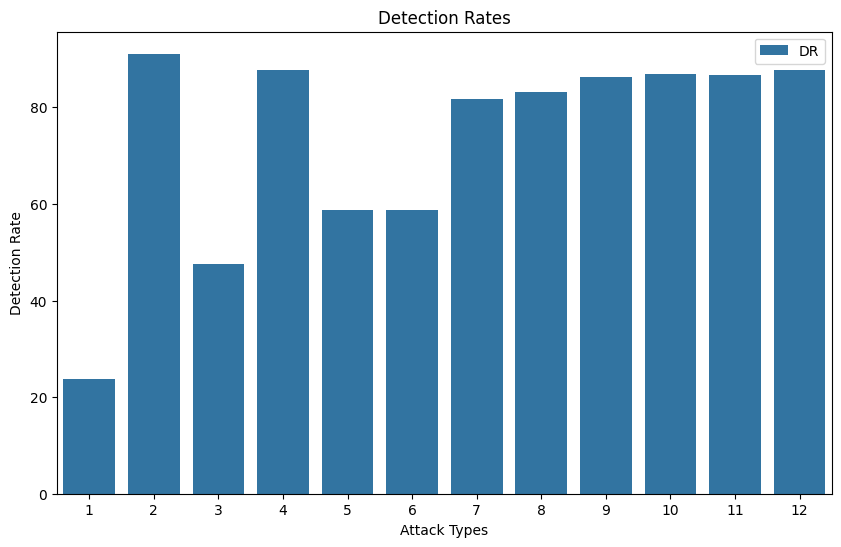

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

mdf = pd.DataFrame(metricarr, columns=['Accuracy', 'DR', 'FAR', 'ZDR'])
plt.figure(figsize=(10, 6))
sns.barplot(data=mdf, x=mdf.index+1, y='DR', label='DR')
plt.xlabel('Attack Types')
plt.ylabel('Detection Rate')
plt.title('Detection Rates')
plt.legend()
plt.show()

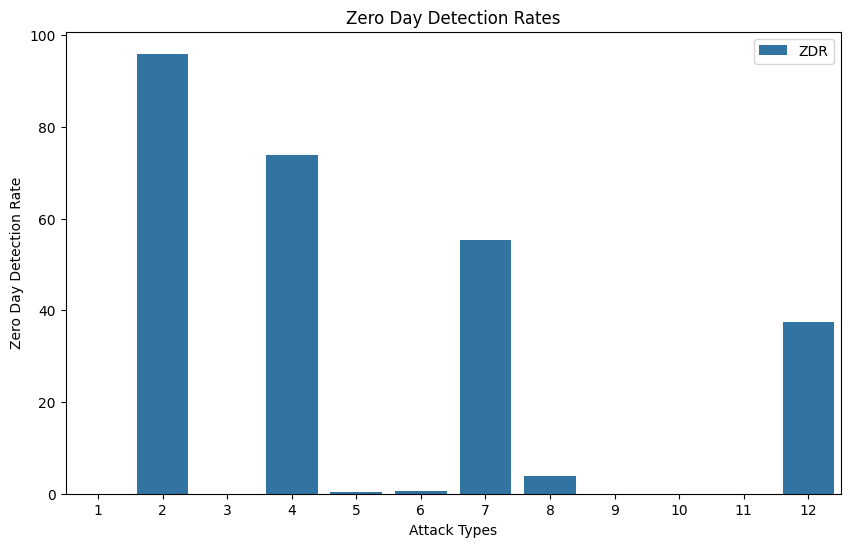

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mdf, x=mdf.index+1, y='ZDR', label='ZDR')
plt.xlabel('Attack Types')
plt.ylabel('Zero Day Detection Rate')
plt.title('Zero Day Detection Rates')
plt.legend()
plt.show()

Wasserstein Distance Calculation

In [22]:
from scipy.stats import wasserstein_distance as wd
from scipy.stats import ks_2samp as ks

In [23]:
wdarr=np.array([])
ksarr=np.array([])
for att_type in range(1,13):
    X_nz = (df_scaled[~df_scaled["Label"].isin([0,att_type])])
    X_z = (df_scaled[df_scaled["Label"] == att_type])
    arr1=np.array([])
    arr2=np.array([])
    for i in range(71):
        arr1=np.append(arr1,wd(X_nz.iloc[:,i],X_z.iloc[:,i]))
        arr2=np.append(arr2,ks(X_nz.iloc[:,i],X_z.iloc[:,i]))
    wdarr=np.append(wdarr,sum(arr1)/71)
    ksarr=np.append(ksarr,sum(arr2)/71)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

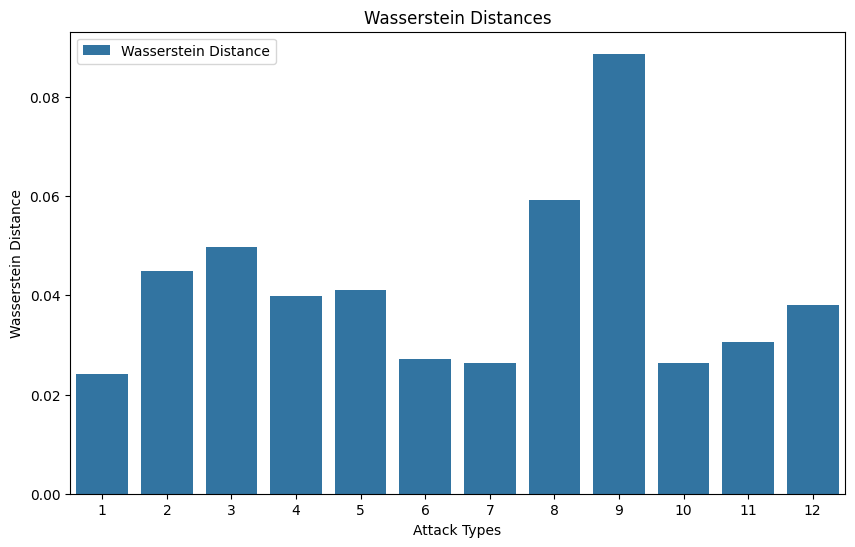

In [25]:
wdf = pd.DataFrame(wdarr, columns=["WD"])
plt.figure(figsize=(10, 6))
sns.barplot(data=wdf, x=wdf.index+1, y='WD', label='Wasserstein Distance')
plt.xlabel('Attack Types')
plt.ylabel('Wasserstein Distance')
plt.title('Wasserstein Distances')
plt.legend()
plt.show()

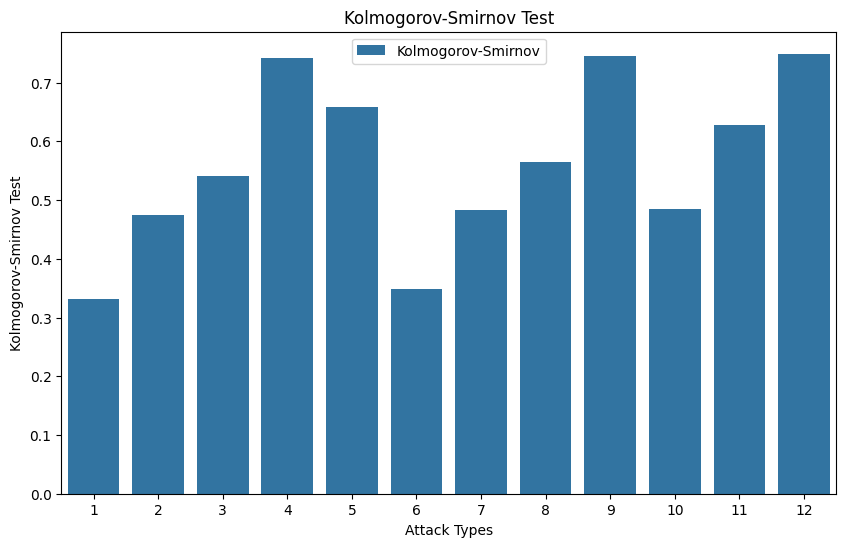

In [26]:
ksdf = pd.DataFrame(ksarr, columns=["KS"])
plt.figure(figsize=(10, 6))
sns.barplot(data=ksdf, x=ksdf.index+1, y='KS', label='Kolmogorov-Smirnov')
plt.xlabel('Attack Types')
plt.ylabel('Kolmogorov-Smirnov Test')
plt.title('Kolmogorov-Smirnov Test')
plt.legend()
plt.show()